In [2]:
!wget https://github.com/nandakishormpai2001/Plant_Disease_Detector/raw/main/model/dataset.zip

--2023-05-21 11:47:56--  https://github.com/nandakishormpai2001/Plant_Disease_Detector/raw/main/model/dataset.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/nandakishormpai/Plant_Disease_Detector/raw/main/model/dataset.zip [following]
--2023-05-21 11:47:56--  https://github.com/nandakishormpai/Plant_Disease_Detector/raw/main/model/dataset.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nandakishormpai/Plant_Disease_Detector/main/model/dataset.zip [following]
--2023-05-21 11:47:57--  https://raw.githubusercontent.com/nandakishormpai/Plant_Disease_Detector/main/model/dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubuse

In [3]:

!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/train/
   creating: dataset/train/Cherry___Powdery_mildew/
  inflating: dataset/train/Cherry___Powdery_mildew/00b7df55-c789-43d6-a02e-a579ac9d07e6___FREC_Pwd.M 4748.JPG  
  inflating: dataset/train/Cherry___Powdery_mildew/00d12ac0-a293-47e0-a4c6-a80f37204c39___FREC_Pwd.M 4812.JPG  
  inflating: dataset/train/Cherry___Powdery_mildew/00d12ac0-a293-47e0-a4c6-a80f37204c39___FREC_Pwd.M 4812_flipLR.JPG  
  inflating: dataset/train/Cherry___Powdery_mildew/00e0a4ab-ecbd-4560-a71c-b19d86bb087c___FREC_Pwd.M 4917_flipLR.JPG  
  inflating: dataset/train/Cherry___Powdery_mildew/00f8611c-0f2c-4f24-8241-d1748c8bb48f___FREC_Pwd.M 0479.JPG  
  inflating: dataset/train/Cherry___Powdery_mildew/00f8611c-0f2c-4f24-8241-d1748c8bb48f___FREC_Pwd.M 0479_flipLR.JPG  
  inflating: dataset/train/Cherry___Powdery_mildew/0a283423-3a6d-43a4-92e5-267c8153ca45___FREC_Pwd.M 4921_flipLR.JPG  
  inflating: dataset/train/Cherry___Powdery_mildew/0a5aacba-0363

In [4]:

!pip install -r requirements.txt
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.8.0+cpu (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.

In [5]:
from PIL import Image
import torch
import torchvision
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os
import pickle
     

In [6]:
class Dataset():
    def __init__(self):
        self.labels,self.images = self.load_data()

    # To load images and labels for dataloader
    def load_data(self):
        labels={}
        images = {}
        count = 0
        # setting resize dimensions
        resize = transforms.Compose([transforms.Resize((256,256))])
        main_dir = os.listdir(os.path.join("dataset","train"))
        reference = {}
        # iterating through categories
        for i,dir in enumerate(main_dir):
            reference[dir]=i
            images_list = os.listdir(os.path.join("dataset","train",dir))
            local_cnt = 0
            # iterating through images in a category
            for img in images_list:
                # 500 images from each category
                if local_cnt<500:
                    labels[count] = i
                    img_path = os.path.join("dataset","train",dir,img)
                    image = Image.open(img_path)
                    image = ToTensor()(image)
                    images[count] = resize(image)
                    count+=1
                    local_cnt+=1
                else:
                    break

        print(reference)
        return labels,images
      
    def __len__(self):
        return len(self.labels)
    

    # To return x,y values in each iteration over dataloader as batches.
    def __getitem__(self, idx):
        return (
            self.images[idx],
            self.labels[idx],
        )
     

In [7]:
# Inherit from Dataset class
class ValDataset(Dataset):

    def load_data(self):
          labels={}
          images = {}
          count = 0
          resize = transforms.Compose([transforms.Resize((256,256))])
          main_dir = os.listdir(os.path.join("dataset","valid"))
          for i,dir in enumerate(main_dir):
              print(i,dir)
              images_list = os.listdir(os.path.join("dataset","valid",dir))
              local_cnt = 0
              for img in images_list:
                  if(local_cnt<100):
                      labels[count] = i
                      img_path = os.path.join("dataset","valid",dir,img)
                      image = Image.open(img_path)
                      image = ToTensor()(image)
                      images[count] = resize(image)
                      count+=1
                      local_cnt+=1
                  else:
                      break

          return labels,images


In [8]:
# Model Architecture
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()

        # CNNs for rgb images 
        self.conv1= nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5)
        self.conv2= nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
        self.conv3= nn.Conv2d(in_channels=12,out_channels=24,kernel_size=5)
        self.conv4= nn.Conv2d(in_channels=24,out_channels=48,kernel_size=5)
        
        # Connecting CNN outputs with Fully Connected layers
        self.fc1 = nn.Linear(in_features=48*12*12,out_features=240)
        self.fc2 = nn.Linear(in_features=240,out_features=120)
        self.out = nn.Linear(in_features=120,out_features=17)
        
        
    def forward(self,t):
        t = t
        
        t=self.conv1(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size = 2, stride = 2)
        
        
        t=self.conv2(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size = 2, stride = 2)

        t=self.conv3(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size = 2, stride = 2)

        t=self.conv4(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size = 2, stride = 2)
        
        t=t.reshape(-1,48*12*12)
        t=self.fc1(t)
        t=F.relu(t)
        
        
        t=self.fc2(t)
        t=F.relu(t)
        
        t=self.out(t)
        
        
        return t

In [9]:
model = Network()
    

In [10]:
dataset = Dataset()

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


{'Tomato___Tomato_mosaic_virus': 0, 'Pepper___healthy': 1, 'Potato___Early_blight': 2, 'Tomato___Early_blight': 3, 'Potato___Late_blight': 4, 'Cherry___Powdery_mildew': 5, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 6, 'Tomato___healthy': 7, 'Tomato___Septoria_leaf_spot': 8, 'Tomato___Target_Spot': 9, 'Pepper___Bacterial_spot': 10, 'Cherry___healthy': 11, 'Tomato___Late_blight': 12, 'Potato___healthy': 13, 'Tomato___Leaf_Mold': 14, 'Tomato___Bacterial_spot': 15, 'Tomato___Spider_mites Two-spotted_spider_mite': 16}


In [11]:

valdataset = ValDataset()

0 Tomato___Tomato_mosaic_virus
1 Pepper___healthy
2 Potato___Early_blight
3 Tomato___Early_blight
4 Potato___Late_blight
5 Cherry___Powdery_mildew
6 Tomato___Tomato_Yellow_Leaf_Curl_Virus
7 Tomato___healthy
8 Tomato___Septoria_leaf_spot
9 Tomato___Target_Spot
10 Pepper___Bacterial_spot
11 Cherry___healthy
12 Tomato___Late_blight
13 Potato___healthy
14 Tomato___Leaf_Mold
15 Tomato___Bacterial_spot
16 Tomato___Spider_mites Two-spotted_spider_mite


In [12]:
# Function to return number of correct predictions in a batch
def get_num_correct(preds,labels):
    return preds.argmax(dim=1).eq(labels).sum().item()
     

In [45]:
# import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

def train(dataset, valdataset, model):
    model.train()

    # Data preprocessing and augmentation
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize the input data
    ])
    dataset.transform = transform
    valdataset.transform = transform

    # Dataloader in PyTorch to load the validation and training dataset
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)
    valdataloader = torch.utils.data.DataLoader(valdataset, batch_size=32, shuffle=True)

    # Define the loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3)  # Learning rate scheduler
    num_of_epochs = 15
    epochs = []
    losses = []
    best_val_loss = float('inf')  # Track the best validation loss
    best_model_state = None  # Track the state of the best model

    for epoch in range(num_of_epochs):
        cnt = 0
        tot_loss = 0
        tot_correct = 0

        # Training loop
        for batch, (x, y) in enumerate(dataloader):
            optimizer.zero_grad()
            y_pred = model(x)
            loss = criterion(y_pred, y)
            loss.backward()
            optimizer.step()

            tot_loss += loss.item()
            tot_correct += (y_pred.argmax(1) == y).sum().item()

        # Validation loop
        val_loss = 0
        val_correct = 0
        with torch.no_grad():
            for batch, (x, y) in enumerate(valdataloader):
                y_pred = model(x)
                loss = criterion(y_pred, y)
                val_loss += loss.item()
                val_correct += (y_pred.argmax(1) == y).sum().item()

        scheduler.step(val_loss)  # Adjust learning rate based on validation loss

        # Track the best model based on validation loss
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict()

        epochs.append(epoch)
        losses.append(val_loss)
        print("Epoch", epoch, "Train Acc:", tot_correct / len(dataset),
              "Val Acc:", val_correct / len(valdataset), "Train Loss:", tot_loss, "Val Loss:", val_loss)

    # Load the best model state
    model.load_state_dict(best_model_state)

    # Plot Validation Loss vs Epochs graph
    plt.plot(epochs, losses, color='green', linewidth=3, marker='o', markerfacecolor='blue', markersize=8)
    plt.xlabel('Epochs', color='m', fontsize='xx-large')
    plt.ylabel('Loss', color='m', fontsize='xx-large')
    axes = plt.gca()  # 'gca' - get current axes
    axes.set_facecolor('c')  # 'c' - cyan
    axes.tick_params(axis='y', which='both', colors='tomato')
    axes.tick_params(axis='x', which='both', colors='#20ff14')
    plt.title("Val Loss vs Epoch", color='m', fontsize='xx-large')

    plt.show()

    return model


Epoch 0 Train Acc: 0.7223529411764706 Val Acc: 0.4235294117647059 Train Loss: 14.27606537938118 Val Loss: 12.14737319946289
Epoch 1 Train Acc: 0.8835294117647059 Val Acc: 0.5235294117647059 Train Loss: 5.848813503980637 Val Loss: 11.622331023216248
Epoch 2 Train Acc: 0.9611764705882353 Val Acc: 0.48823529411764705 Train Loss: 2.1499436050653458 Val Loss: 12.757199883460999
Epoch 3 Train Acc: 0.9858823529411764 Val Acc: 0.5117647058823529 Train Loss: 1.200928594917059 Val Loss: 14.448716521263123
Epoch 4 Train Acc: 0.9929411764705882 Val Acc: 0.5294117647058824 Train Loss: 0.7054875958710909 Val Loss: 16.52084755897522
Epoch 5 Train Acc: 0.9952941176470588 Val Acc: 0.5294117647058824 Train Loss: 0.525053346529603 Val Loss: 17.06902265548706
Epoch 6 Train Acc: 0.9976470588235294 Val Acc: 0.5529411764705883 Train Loss: 0.3454710301011801 Val Loss: 16.64723229408264
Epoch 7 Train Acc: 0.9988235294117647 Val Acc: 0.5470588235294118 Train Loss: 0.2594435838982463 Val Loss: 16.981901049613953

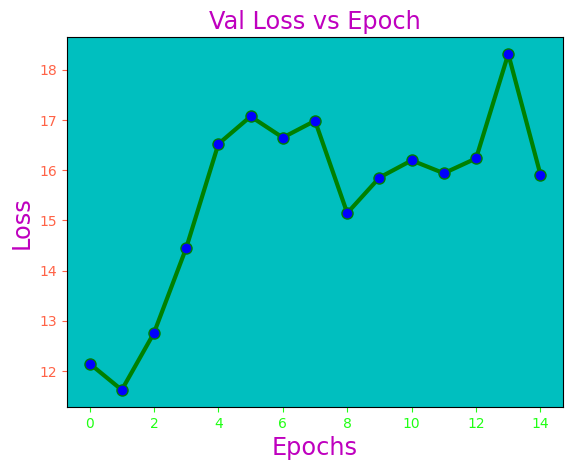

Network(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(12, 24, kernel_size=(5, 5), stride=(1, 1))
  (conv4): Conv2d(24, 48, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=6912, out_features=240, bias=True)
  (fc2): Linear(in_features=240, out_features=120, bias=True)
  (out): Linear(in_features=120, out_features=17, bias=True)
)

In [46]:

train(dataset,valdataset, model)


In [47]:

# Saving labels to label value as a json
main_dir = os.listdir(os.path.join("dataset","train"))
reference = {}
for i,dir in enumerate(main_dir):
    reference[dir]=i
with open('labels.json', 'wb') as iw:
    pickle.dump(reference, iw)

In [48]:

#Save the trained model
torch.save(model.state_dict(), "model.pth")

In [49]:

# prediction function to test
def predict(img_path):
    image = Image.open(img_path)
    image = ToTensor()(image)
    resize = transforms.Compose([transforms.Resize((256,256))])
    y_result = model(resize(image).unsqueeze(0))
    result_idx = y_result.argmax(dim=1)
    for key,value in reference.items():
        if(value==result_idx):
            print(key)
            break
      

In [52]:
predict("/content/drive/MyDrive/ML LAB/pw/potato-early-blight-lesions.jpeg")

Cherry___Powdery_mildew


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
